In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
import gzip  #处理gzip文件

In [33]:
import os
import matplotlib.image as img
from skimage.color import rgb2gray    #将RGB图像转为灰度图像
os.getcwd()  #返回当前工作目录

def get_sample(path):
    list_dir = os.listdir(path)
    ix = [int(i) for i in np.arange(0, len(list_dir), 80)]   #os.listdir(path) 返回指定的文件夹包含的文件或文件夹的名字的列表
    #np.arange 起始,终止,步长

    data_files = [list_dir[i] for i in (ix)]
    #每隔80个取出一个文件

    print(len(ix))
    
    img_data = []
    for file in data_files:
        img_data.append(rgb2gray(plt.imread(path + '/' + file)))    #将文件中的数据保存到data的list中
    img_data = np.array(img_data)
    images = img_data
    img_data = img_data.reshape(90, 128*128)   #将data进行reshape
    return img_data, images

path = './coil-100'
sample_data, sample_images = get_sample(path)  #获取sample
sample_data.shape   #显示sample_data的形状
sample_images.shape  #显示sample_images的形状

90


(90, 128, 128)

In [34]:
import os
import matplotlib.image as img
from skimage.color import rgb2gray
os.getcwd()

def get_sample(path):
    list_dir = os.listdir(path)
    ix = [int(i) for i in np.arange(4680, 4752, 1)]

    data_files = [list_dir[i] for i in (ix)]

    print(len(ix))
    
    img_data = []
    for file in data_files:
        img_data.append(rgb2gray(plt.imread(path + '/' + file)))
    img_data = np.array(img_data)
    images = img_data
    img_data = img_data.reshape(72, 128*128)   #将data进行reshape
    return img_data, images

path = './coil-100'
sample_data, sample_images = get_sample(path)
sample_data.shape
sample_images.shape

72


(72, 128, 128)

In [35]:
# define a function to plot small images over the data points
from matplotlib import offsetbox    #调用offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    project = model.fit_transform(data)   #对数据进行拟合fit和transform
    ax.plot(project[:, 0], project[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(project.max(0) - project.min(0))) ** 2   #设置最小的分布
        shown_images = np.array([2 * project.max(0)])
        for i in range(data.shape[0]):   #遍历data
            dist = np.sum((project[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, project[i]])   #按垂直方向(行顺序)堆叠数组构成一个新的数组
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      project[i])   #AnnotationBbox是一个标注框，其中可以放置任何Artist对象
            ax.add_artist(imagebox)     #将图片展示

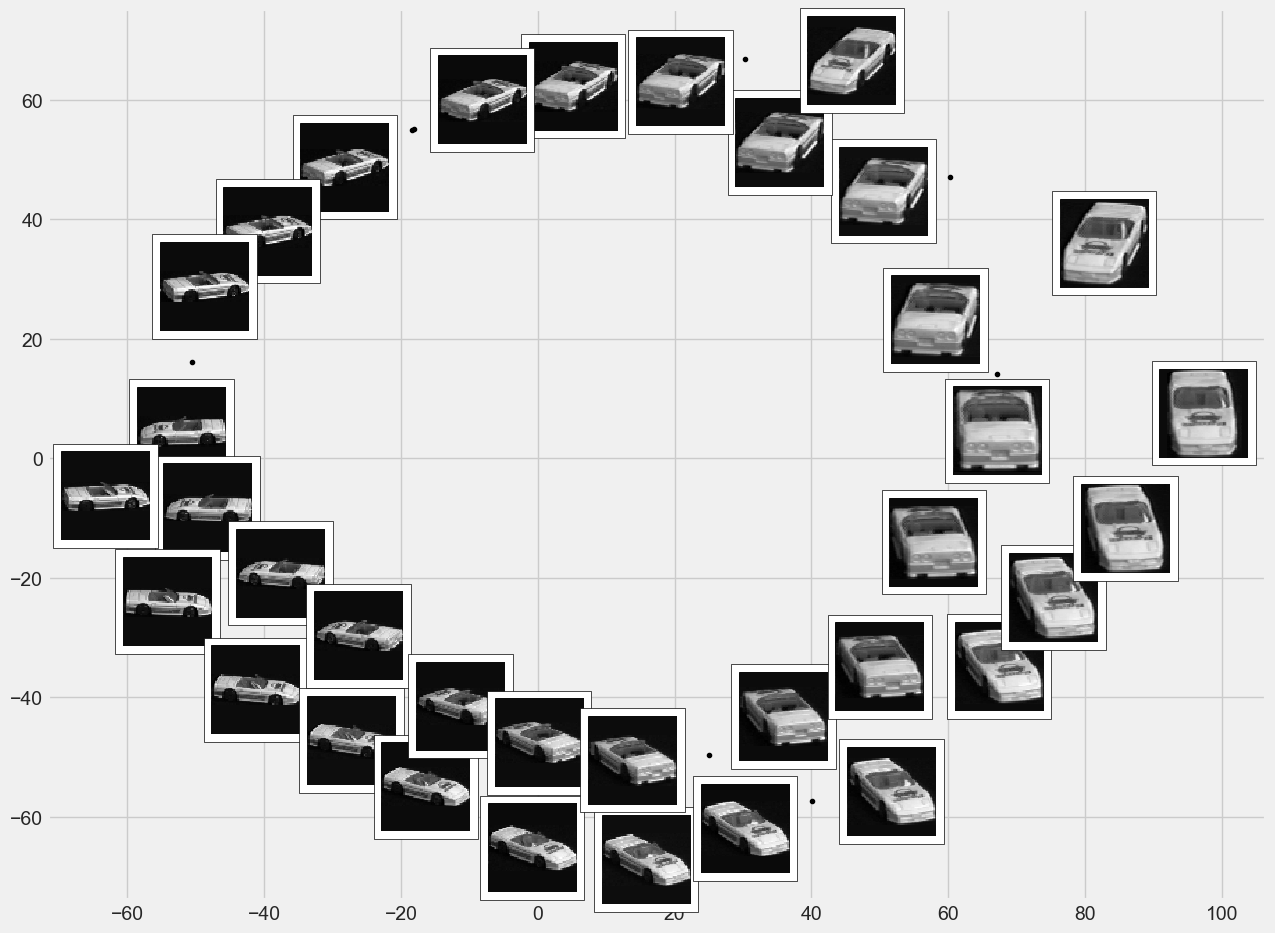

In [54]:
from sklearn.manifold import Isomap   #从sklearn.manifold中引入isomap
#plt.style.use('default')
#plt.style.use('dark_background') 
plt.style.use('fivethirtyeight')   #绘图风格
fig, ax = plt.subplots(figsize=(14, 11))  #绘图大小
plot_components(sample_data,
                model=Isomap(n_components=2),
                images=sample_images[:, ::2, ::2],
                thumb_frac=0.08)    #画图